In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sns

In [23]:
wine_df=pd.read_csv("winequality-red[1].csv", sep=";")
wine_df.head()
wine_df.tail()
pd.DataFrame(wine_df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [24]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


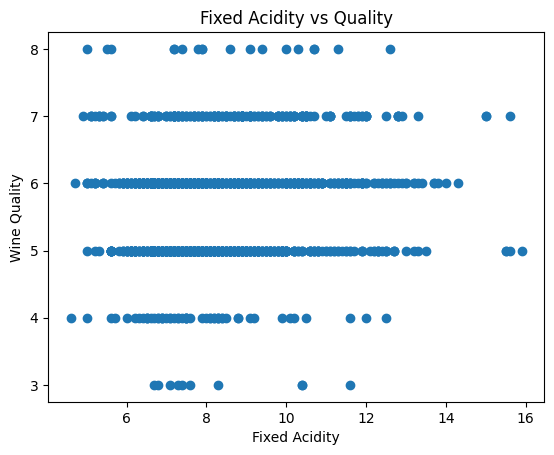

In [28]:
plt.scatter(wine_df['fixed acidity'], wine_df['quality'])
plt.xlabel("Fixed Acidity")
plt.ylabel("Wine Quality")
plt.title("Fixed Acidity vs Quality")
plt.show()

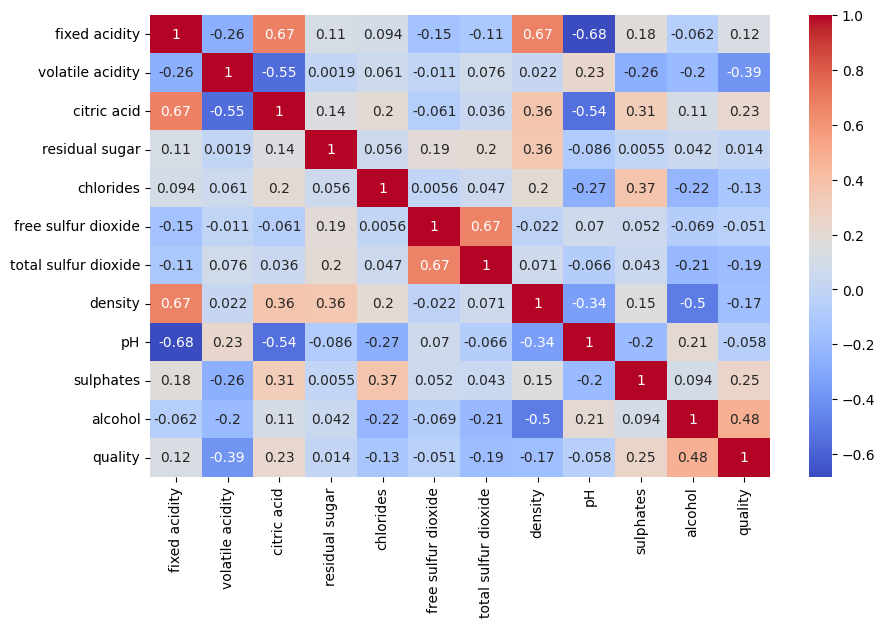

In [29]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(wine_df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [45]:
wine_df["quality"].unique

<bound method Series.unique of 0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64>

In [33]:
print(wine_df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [35]:
wine_df["citric acid"]
wine_df["sulphates"]
wine_df["alcohol"]


0        9.4
1        9.8
2        9.8
3        9.8
4        9.4
        ... 
1594    10.5
1595    11.2
1596    11.0
1597    10.2
1598    11.0
Name: alcohol, Length: 1599, dtype: float64

In [37]:
wine_df.columns=wine_df.columns.str.strip().str.lower().str.replace(" ","_").str.replace("(","").str.replace(")","")
wine_df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [39]:
x=wine_df[["citric_acid","sulphates","alcohol"]]
y=wine_df["quality"]

In [47]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [58]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=500, random_state=42)
rf.fit(x_train, y_train)

,n_estimators,500
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [59]:
y_pred=rf.predict(x_test)
y_pred

array([5.69233333, 5.1696    , 5.628     , 5.724     , 5.982     ,
       4.958     , 5.196     , 5.0442    , 5.5055    , 5.762     ,
       6.714     , 5.33      , 5.64633333, 5.686     , 5.266     ,
       6.212     , 5.07853333, 6.14340476, 6.368     , 5.26666667,
       4.64      , 5.756     , 5.244     , 5.85      , 5.2719    ,
       5.91      , 6.394     , 5.232     , 5.332     , 5.984     ,
       5.6624    , 5.006     , 5.70666667, 5.23      , 5.742     ,
       5.206     , 6.556     , 5.982     , 5.162     , 6.028     ,
       4.60303333, 5.54113333, 5.492     , 5.0465    , 5.354     ,
       5.862     , 6.78      , 5.454     , 5.096     , 5.546     ,
       4.97433333, 5.328     , 5.568     , 7.038     , 5.038     ,
       5.683     , 5.952     , 5.83      , 5.07      , 5.04      ,
       5.406     , 6.056     , 5.132     , 5.274     , 6.624     ,
       5.054     , 7.374     , 5.322     , 6.784     , 5.656     ,
       5.858     , 5.152     , 5.35466667, 5.052     , 5.964  

In [60]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

Coefficients: [0.485231   0.74897338 0.34056166]
Intercept: 1.4493682628684503
0.4268350192742741
0.34685356963365166


In [63]:
df_compare=pd.DataFrame({"Actual": y_test.values,"Predicted": y_pred})
df_compare.head(10)

,Actual,Predicted
0,6,5.692333
1,5,5.169600
2,6,5.628000
3,5,5.724000
4,6,5.982000
5,5,4.958000
6,5,5.196000
7,5,5.044200
8,5,5.505500
9,6,5.762000


In [70]:
import joblib
joblib.dump(rf, "wine_model.pkl")


['wine_model.pkl']

In [71]:
new_wine = [[7.3,1.9, 0.57]]

prediction = model.predict(new_wine)

print("Predicted wine quality:", prediction)



Predicted wine quality: [6.60872416]


c:\Users\KING\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
